### In this project, we will work on the US hospitals Diabetes data for years 1999-2008. 
The dataset is available at https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008. 
It contains data for 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied a set of criteria which could be found at the data page. There are two tables in this dataset, one is the table containing all the data and the other is the metadata table.

We are going to build a model to predict the readmitted type of the encounter based on the various information in the diabetic dataset. The readmitted type reflects the days to inpatient readmission. Values is “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission. This is a classification problem

First, load the two tables.

In [1]:
library(tidyverse)
library(magrittr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



In [2]:
diabetes <- read_csv("F:/Data Science/Data Wrangling/project/Diabetes 130-US hospitals for years 1999-2008/dataset_diabetes/diabetic_data.csv")
metadata <- read_csv("F:/Data Science/Data Wrangling/project/Diabetes 130-US hospitals for years 1999-2008/dataset_diabetes/IDs_mapping.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  encounter_id = col_integer(),
  patient_nbr = col_integer(),
  admission_type_id = col_integer(),
  discharge_disposition_id = col_integer(),
  admission_source_id = col_integer(),
  time_in_hospital = col_integer(),
  num_lab_procedures = col_integer(),
  num_procedures = col_integer(),
  num_medications = col_integer(),
  number_outpatient = col_integer(),
  number_emergency = col_integer(),
  number_inpatient = col_integer(),
  number_diagnoses = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  admission_type_id = col_character(),
  description = col_character()
)


In [3]:
diabetes %>% head()
metadata 


encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
NA,NA
discharge_disposition_id,description


Find the number of total rows in the two data frames.

In [4]:
diabetes %>%  count()
metadata %>% count()

n
101766


n
67


Check the data types of each column in the diabetes data frame.

In [6]:
diabetes %>% glimpse()

Observations: 101,766
Variables: 50
$ encounter_id               <int> 2278392, 149190, 64410, 500364, 16680, 3...
$ patient_nbr                <int> 8222157, 55629189, 86047875, 82442376, 4...
$ race                       <chr> "Caucasian", "Caucasian", "AfricanAmeric...
$ gender                     <chr> "Female", "Female", "Female", "Male", "M...
$ age                        <chr> "[0-10)", "[10-20)", "[20-30)", "[30-40)...
$ weight                     <chr> "?", "?", "?", "?", "?", "?", "?", "?", ...
$ admission_type_id          <int> 6, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1...
$ discharge_disposition_id   <int> 25, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, ...
$ admission_source_id        <int> 1, 7, 7, 7, 7, 2, 2, 7, 4, 4, 7, 4, 7, 7...
$ time_in_hospital           <int> 1, 3, 2, 2, 1, 3, 4, 5, 13, 12, 9, 7, 7,...
$ payer_code                 <chr> "?", "?", "?", "?", "?", "?", "?", "?", ...
$ medical_specialty          <chr> "Pediatrics-Endocrinology", "?", "?", "?...
$ num_lab_proced

### We can find that the diabetes table is quite messy, there are many missing values represented by "?" and many of the categorical data fields are labeled using "Yes" and "No" and some other notations which is not efficient for analysis. And the values in the age column are ranges which is difficult to handle. Also, all the metadata is stored in one table making it difficult if we want to join the table with the main table. There are also some other issues with this dataset and hence we chose to work on it. In this project, we will wrangle the dataset into a tidy format and split the metadata into several seperate tables which will make a coherent relational data model.

Also, there are in total 50 columns in this dataset, and some of the column names are not so clear in meaning, the detailed explanation of the columns are diplayed on this website https://www.hindawi.com/journals/bmri/2014/781670/tab1/. We can scrape this table and save it as a metadata table.

In [7]:
library(rvest)

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding



In [8]:
url <- "https://www.hindawi.com/journals/bmri/2014/781670/tab1/"

In [12]:
library(dplyr)

In [16]:
df <- url %>%
  read_html() %>%
  html_nodes(".table") %>%
  html_table() #header=TRUE
df

X1,X2,X3,X4
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%


In [17]:
df %>% class()
df %>% length()

[1] "list"

[1] 1

In [18]:
df[[1]][2]

X2
""
Type
""
Numeric
Numeric
Nominal
Nominal
Nominal
Numeric
Nominal


In [19]:
attributes <- as_tibble(x=c(df[[1]][1], df[[1]][2], df[[1]][3], df[[1]][4]))
attributes

X1,X2,X3,X4
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%


In [20]:
attributes %>% class
attributes %>% length

[1] "tbl_df"     "tbl"        "data.frame"

[1] 4

In [21]:
attributes %>%
  filter(X2=="Numeric")

X1,X2,X3,X4
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Weight,Numeric,Weight in pounds.,97%
Time in hospital,Numeric,Integer number of days between admission and discharge,0%
Number of lab procedures,Numeric,Number of lab tests performed during the encounter,0%
Number of procedures,Numeric,Number of procedures (other than lab tests) performed during the encounter,0%
Number of medications,Numeric,Number of distinct generic names administered during the encounter,0%
Number of outpatient visits,Numeric,Number of outpatient visits of the patient in the year preceding the encounter,0%
Number of emergency visits,Numeric,Number of emergency visits of the patient in the year preceding the encounter,0%
Number of inpatient visits,Numeric,Number of inpatient visits of the patient in the year preceding the encounter,0%


In [22]:
attributes %>% names()

[1] "X1" "X2" "X3" "X4"

In [23]:
attributes %>% count()

n
32


In [25]:
colnames(attributes) <- (attributes[2, ])

In [26]:
attributes %>% names()
attributes %>% head()

[1] "Feature name"           "Type"                   "Description and values"
[4] "% missing"

Feature name,Type,Description and values,% missing
,,,
Feature name,Type,Description and values,% missing
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%


In [27]:
df <- attributes

In [28]:
attributes %<>% 
    filter(row_number() != 2L) #drop the second row which is the name of the columns

In [29]:
attributes %>% count()

n
31


In [30]:
attributes #this is the attributes table we got which describes the attributes in the diabetes table

Feature name,Type,Description and values,% missing
,,,
,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hispanic, and other",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",0%
Discharge disposition,Nominal,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available",0%


### Split the metadata table into three tables containing the descriptions of code for columns "admission_type_id", "discharge_disposition_id", "admission_source_id" respectively. 

In [31]:
admission_type <- metadata %>%
   slice(1:8)

In [32]:
admission_type

admission_type_id,description
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped


In [33]:
discharge_disposition <- metadata %>%
   slice(11:40)

In [34]:
discharge_disposition

admission_type_id,description
1,Discharged to home
2,Discharged/transferred to another short term hospital
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpatient care institution
6,Discharged/transferred to home with home health service
7,Left AMA
8,Discharged/transferred to home under care of Home IV provider
9,Admitted as an inpatient to this hospital
10,Neonate discharged to another hospital for neonatal aftercare


In [35]:
admission_source <- metadata %>%
   slice(43:67)

In [36]:
admission_source

admission_type_id,description
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)
6,Transfer from another health care facility
7,Emergency Room
8,Court/Law Enforcement
9,Not Available
10,Transfer from critial access hospital


Next, we will work on the diabetes data frame. First, count he missing values in each column.

In [37]:
diabetes 

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [39]:
diabetes %>% head() %>% is.na() 

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### This is not working as the missing values in this data frame are represented by question marks.
We need to replace the "?" by NAs.
First, count the observations with values as "?" in each row. This is ensure our repalcing worked properly by comparing this result with the result of replacing.

In [40]:
map_df(diabetes, ~sum(. == "?"))

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2273,0,0,98569,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
top <- diabetes %>% head()

In [42]:
map_df(top, ~sum(. == "?")) %>% 
  select_if(.!=0)

weight,payer_code,medical_specialty,diag_2,diag_3
6,6,5,1,1


In [43]:
top %<>%
  mutate_all(.,funs(replace(.,.=="?", NA)))

In [44]:
map_df(top, ~sum(is.na(.)))

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
map_df(top, ~sum(is.na(.))) %>%
  select_if(.!=0)

weight,payer_code,medical_specialty,diag_2,diag_3
6,6,5,1,1


The result is consistent with the count of question marks indicating the convertion works well.

### Further, we found that in the "Glucose serum test result" and "A1c test result" columns, the value of "none" stands for the this statistics is not measured. In this case, these "none" values should be treated as NAs also.

In [46]:
top %<>%
  mutate_all(.,funs(replace(.,.=="None", NA)))

In [47]:
map_df(top, ~sum(is.na(.))) %>%
  select_if(.!=0)

weight,payer_code,medical_specialty,diag_2,diag_3,max_glu_serum,A1Cresult
6,6,5,1,1,6,6


Now we can check the missing values using the functions in skimr and visualise it using visdat.

In [48]:
library(skimr)
library(visdat)

In [49]:
diabetes %>%
  skim() %>%
  kable()

Skim summary statistics  
 n obs: 101766    
 n variables: 50    

Variable type: character

|         variable         | missing | complete |   n    | min | max | empty | n_unique |
|--------------------------|---------|----------|--------|-----|-----|-------|----------|
|        A1Cresult         |    0    |  101766  | 101766 |  2  |  4  |   0   |    4     |
|         acarbose         |    0    |  101766  | 101766 |  2  |  6  |   0   |    4     |
|      acetohexamide       |    0    |  101766  | 101766 |  2  |  6  |   0   |    2     |
|           age            |    0    |  101766  | 101766 |  6  |  8  |   0   |    10    |
|          change          |    0    |  101766  | 101766 |  2  |  2  |   0   |    2     |
|      chlorpropamide      |    0    |  101766  | 101766 |  2  |  6  |   0   |    4     |
|       citoglipton        |    0    |  101766  | 101766 |  2  |  2  |   0   |    1     |
|       diabetesMed        |    0    |  101766  | 101766 |  2  |  3  |   0   |    2     |
|      

Note that this dataset is too large to plot in visdat library, we can change the warn_large_data=FALSE to plot the whole dataset, but it will be time consuming (which takes several minutes) and the output is just a blank plot. This issue is mentioned in the documentation of visdat library. As we just want to check the portions of missing data values, we can sample the dataset and plot it.

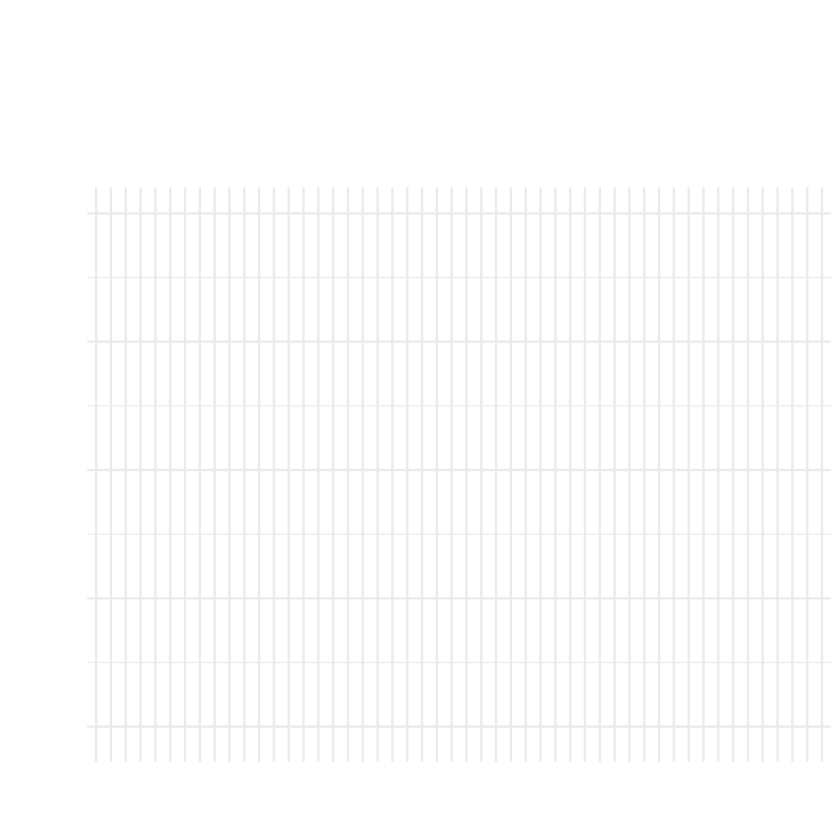

In [25]:
diabetes %>%
  vis_miss(warn_large_data=FALSE)

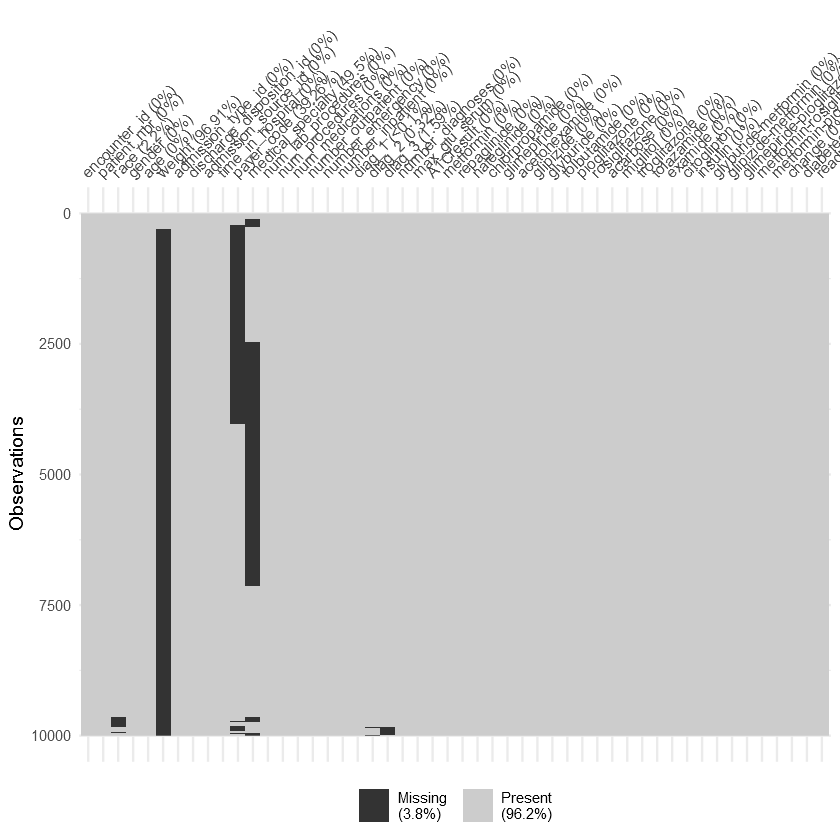

In [30]:
diabetes %>%
  sample_n(10000) %>%
  vis_miss(cluster=TRUE)

We can find that there are several columns associated with missing values, specifically, race, weight, pay_code, medical_specialty, diag_1, diag_2 and diag_3. Among them, most of the observations in weight column are empty, about half of the abservations in payer_code and medical_specialty columns. 

First, try to fit the random forest to this dataset.
### But when we try to fit the model, the problem is that the name of the column "glyburide-metformin" contains a hyphen which is confusing. So we need to replace "-" with "_" before we analyse the dataset.

In [38]:
colnames(diabetes)

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type_id"        "discharge_disposition_id"
 [9] "admission_source_id"      "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide-metformin"      "glipizide-metformin"     
[45] "glimepiride-pioglitazone" "metformin-rosiglitazone" 
[47] "metformin-pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

In [67]:
diabetes %<>%
  rename(glyburide_metformin="glyburide-metformin",
         glipizide_metformin="glipizide-metformin",
         glimepiride_pioglitazone="glimepiride-pioglitazone",
         metformin_rosiglitazone="metformin-rosiglitazone",
         metformin_pioglitazone="metformin-pioglitazone")

In [68]:
colnames(diabetes)

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type_id"        "discharge_disposition_id"
 [9] "admission_source_id"      "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide_metformin"      "glipizide_metformin"     
[45] "glimepiride_pioglitazone" "metformin_rosiglitazone" 
[47] "metformin_pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

### We would like to build a model to predict whether a patient will be readmitted or not which is a binary classification problem. But there are three values in the readmitted column, we need to turn it into binary. The rule is, turn the "NO" into 0 which stands for no admition and both ">30" and "<30" which stands for readmitted for more than and less than 30 days into 1.

In [84]:
top <- diabetes %>% head() # this is used to develop the code for transform the readmitted type
top

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [85]:
top %<>% mutate(readmitted = ifelse(readmitted=="NO", 0, 1))

In [86]:
top

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,1


In [90]:
diabetes %<>% mutate(readmitted = ifelse(readmitted=="NO", "0", "1"))

In [93]:
diabetes %>% tail()

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,1
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,1
443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,0
443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,0
443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,0


In [88]:
diabetes %>% select(metformin) %>% distinct()

metformin
No
Steady
Up
Down


In [89]:
diabetes %>% select(repaglinide) %>% distinct()

repaglinide
No
Up
Steady
Down


In [69]:
library(randomForest)

### Split the dataset into training set and test set.

In [94]:
diabetes %>% count()

n
101766


In [95]:
train <- diabetes %>% sample_frac(0.8)

In [96]:
train %>% count()

n
81413


In [97]:
train %>% class

[1] "tbl_df"     "tbl"        "data.frame"

In [98]:
sid <- as.numeric(rownames(train))
test <- diabetes[-sid, ]

In [99]:
test %>% count()

n
20353


In [100]:
train %>% length()

[1] 50

In [77]:
names(train)

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type_id"        "discharge_disposition_id"
 [9] "admission_source_id"      "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide_metformin"      "glipizide_metformin"     
[45] "glimepiride_pioglitazone" "metformin_rosiglitazone" 
[47] "metformin_pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

In [103]:
train %>% head()

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
46839906,57505023,Caucasian,Female,[70-80),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,1
369705902,98449092,Caucasian,Female,[70-80),?,1,1,1,6,...,No,Up,No,No,No,No,No,Ch,Yes,1
122412420,107272629,Caucasian,Female,[30-40),?,1,1,7,6,...,No,No,No,No,No,No,No,Ch,Yes,0
162088770,95752350,Caucasian,Male,[70-80),?,2,6,7,7,...,No,Down,No,No,No,No,No,Ch,Yes,1
214496298,54565578,Caucasian,Male,[80-90),?,6,1,17,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
20965008,2341521,AfricanAmerican,Female,[70-80),?,2,1,1,10,...,No,No,No,No,No,No,No,No,Yes,0


In [114]:
top %>% select(insulin)

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,1


In [102]:
rf.diabetes <- randomForest(readmitted~repaglinide, data=train,mtry=7, importance=TRUE)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in data.matrix(x):
"NAs introduced by coercion"

ERROR: Error in randomForest.default(m, y, ...): NA/NaN/Inf in foreign function call (arg 1)


In [112]:
glm.fit=glm(readmitted~num_lab_procedures+num_procedures,data=train,family=binomial)

In [113]:
summary(glm.fit)
coef(glm.fit)


Call:
glm(formula = readmitted ~ num_lab_procedures + num_procedures, 
    family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.297  -1.119  -1.021   1.229   1.446  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.2728630  0.0176086  -15.50   <2e-16 ***
num_lab_procedures  0.0043556  0.0003588   12.14   <2e-16 ***
num_procedures     -0.0572312  0.0041503  -13.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112333  on 81412  degrees of freedom
Residual deviance: 112012  on 81410  degrees of freedom
AIC: 112018

Number of Fisher Scoring iterations: 4


(Intercept) num_lab_procedures     num_procedures 
      -0.272863007        0.004355608       -0.057231175

In [108]:
?na.omit

na.fail {stats},R Documentation
object,"an R object, typically a data frame"
...,further arguments special methods could require.


In [36]:
diabetes %>% count()

n
101766


In [37]:
diabetes %>%
  length

[1] 49

In [17]:
diabetes %>%
  select("patient_nbr") %>%
  unique() %>%
  count()

n
71518
